In [104]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

**Forecasting (Airlines data)**

**Loading and Analysing data by line plot**

In [105]:
air=pd.read_excel('/content/Airlines+Data.xlsx')
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


**This is airlines data of no.of passengers boarding every month from januaty 1995 to december 2002.**

In [106]:
# Parse strings to datetime type

from datetime import datetime
air['Month'] = pd.to_datetime(air['Month'], infer_datetime_format=True)
indexedDataset = air.set_index(['Month'])

In [107]:
indexedDataset['1995-03']
indexedDataset['1995-03':'1995-06']
indexedDataset['1995']

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


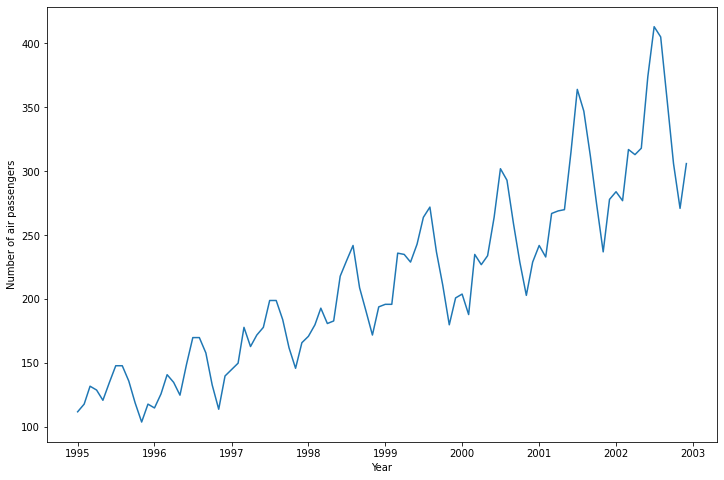

In [108]:
plt.figure(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

**Given data has increasing trend and seasonality.**

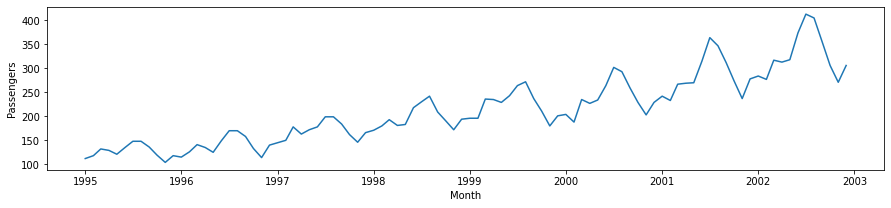

In [109]:
#Line plot

plt.figure(figsize=(15,3))
sns.lineplot(x="Month",y="Passengers",data=indexedDataset);

<Figure size 576x864 with 0 Axes>

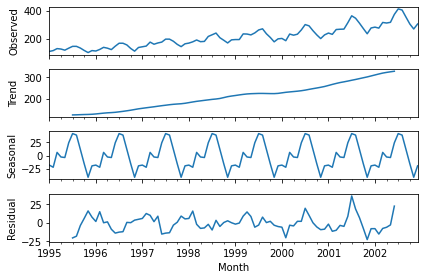

In [110]:
plt.figure(figsize=(8,12))
decompose_ts_add = seasonal_decompose(indexedDataset.Passengers)
decompose_ts_add.plot()
plt.show();

**In the above plot we can clearly see trend and sesonality of data**

*This is also a volatile data we can go for Data Driven Models

*There maybe drastic change of passengers travel because of countries visa policy.

In [111]:
# Splitting data into Train and Test
Train=indexedDataset.head(90)
Test=indexedDataset.tail(6)

In [112]:
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-02-01,277
2002-03-01,317
2002-04-01,313


In [113]:
Test

,Passengers
Month,
2002-07-01,413
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


**Data Driven Models**

In [114]:
# Moving Average

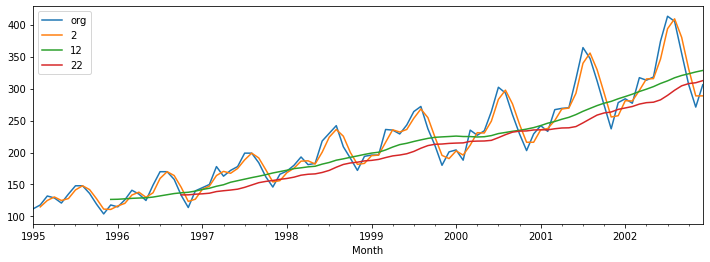

In [115]:
plt.figure(figsize=(12,4))
indexedDataset.Passengers.plot(label="org")
for i in range(2,24,10):
    indexedDataset["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [116]:
# ACF plots and PACF plots

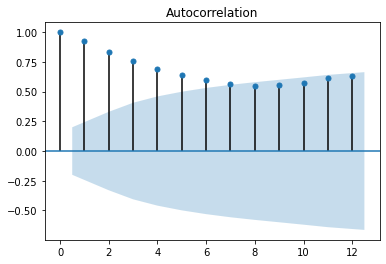

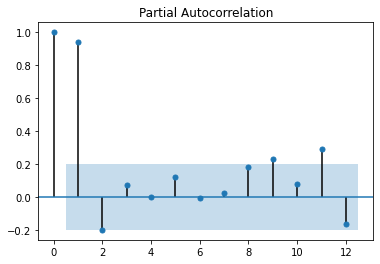

In [117]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(indexedDataset.Passengers,lags=12)
tsa_plots.plot_pacf(indexedDataset.Passengers,lags=12)
plt.show()

In [118]:
# MAPE 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [119]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

13.161170526223493

In [120]:
# Holt method 
hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

27.619306276788702

In [121]:
#Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

2.3842203102653334

In [122]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8309640009827923

In [123]:
# Final Modelbuilding with train+test data

In [124]:
hwe_model_add_add_final = ExponentialSmoothing(indexedDataset["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 

In [125]:
#Forecasting for next 10 time periods
hwe_model_add_add_final.forecast(15)

2003-01-01    320.924021
2003-02-01    313.638039
2003-03-01    352.925020
2003-04-01    350.350301
2003-05-01    356.060923
2003-06-01    408.899129
2003-07-01    446.143114
2003-08-01    433.358026
2003-09-01    382.762460
2003-10-01    336.170254
2003-11-01    303.315050
2003-12-01    349.662471
2004-01-01    356.109876
2004-02-01    348.823895
2004-03-01    388.110875
Freq: MS, dtype: float64

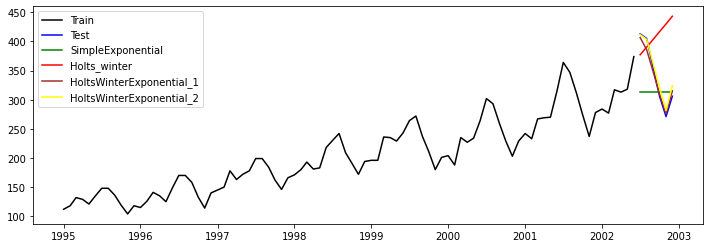

In [126]:
# Visualization of Forecasted values for Test data set using different methods 
plt.figure(figsize=(12,4))
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best');

In [127]:
# Arima Model

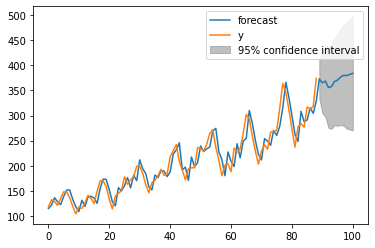

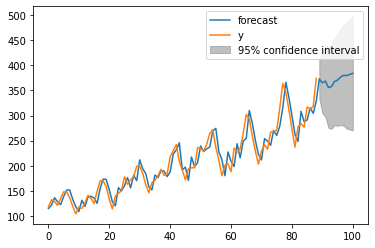

In [128]:
X = Train.Passengers.values
X = X.astype('float32')
model = ARIMA(X, order=(5,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=6)[0]
model_fit.plot_predict(1, 101)

In [129]:
# Error with test data
from sklearn.metrics import mean_squared_error
from math import sqrt
y=Test.Passengers.values
y=y.astype('float32')
rmse = sqrt(mean_squared_error(y, forecast[0:6]))
rmse

53.506893319485805

In [130]:
# Combine train and test data and build final model
# prepare data
final = indexedDataset.Passengers.values
final = final.astype('float32')
model_final = ARIMA(final, order=(5,1,0))
model_fit = model_final.fit()

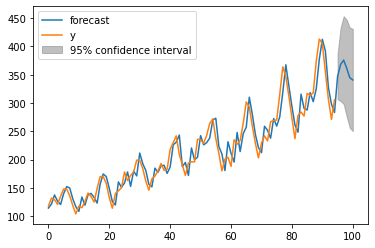

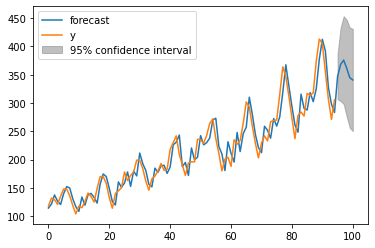

In [131]:
forecast_final=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,101)

In [132]:
forecast_final

array([346.95349551, 368.15875064, 375.80159785, 361.6136709 ,
       344.83396884, 340.75479868, 345.75088787, 356.88527293,
       367.34618987, 371.27585474])

In [133]:
# SARIMAX MODEL

In [134]:
ts = air['Passengers']
ts.tail()

91    405
92    355
93    306
94    271
95    306
Name: Passengers, dtype: int64

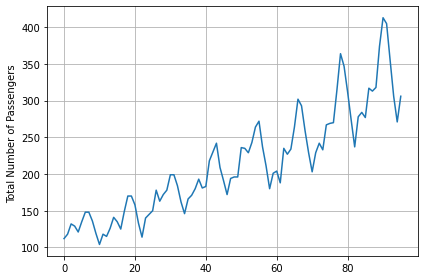

In [135]:
import matplotlib.pylab as plt
plt.plot(ts)
plt.ylabel('Total Number of Passengers ')
plt.grid()
plt.tight_layout()
plt.savefig('Airlines_Passengers.png')
plt.show()

In [136]:
from statsmodels.tsa.stattools import adfuller

def Airlines_Passengers(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non Passengers
        print("X is Passengers")
        return True
    else:
        print("X is not Passengerss")
        return False

In [137]:
ts_diff = pd.Series(ts)
d = 0
while Airlines_Passengers(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1

X is not Passengerss
X is not Passengerss
X is Passengers


**Build the SARIMA model**

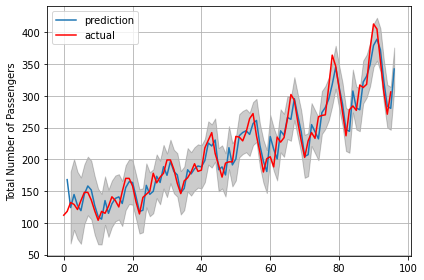

In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 9
q = 1
model = SARIMAX(ts, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')
    
fcast = model_fit.get_prediction(start=1, end=len(ts))
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()


plt.show()
plt.plot(ts_p,label='prediction')
plt.plot(ts,color='red',label='actual')
plt.fill_between(ts_ci.index[1:],
                ts_ci.iloc[1:, 0],
                ts_ci.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel('Total Number of Passengers')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('Passengers.png')
plt.show()

**Calculate some statistics**

In [139]:
from scipy import stats
stats.pearsonr(ts_p[1:], ts[1:]) 

(0.9774422551022851, 1.328321474953254e-64)

In [140]:
residuals = ts - ts_p
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ts-np.mean(ts))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9359717734199418